# K-Means Clustering

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load the dataset

df = pd.read_csv('iris.csv')
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# remove the output Species and create a new dataset in which we could apply unsupervised ML

dataset = df.iloc[:, :-1]
dataset.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


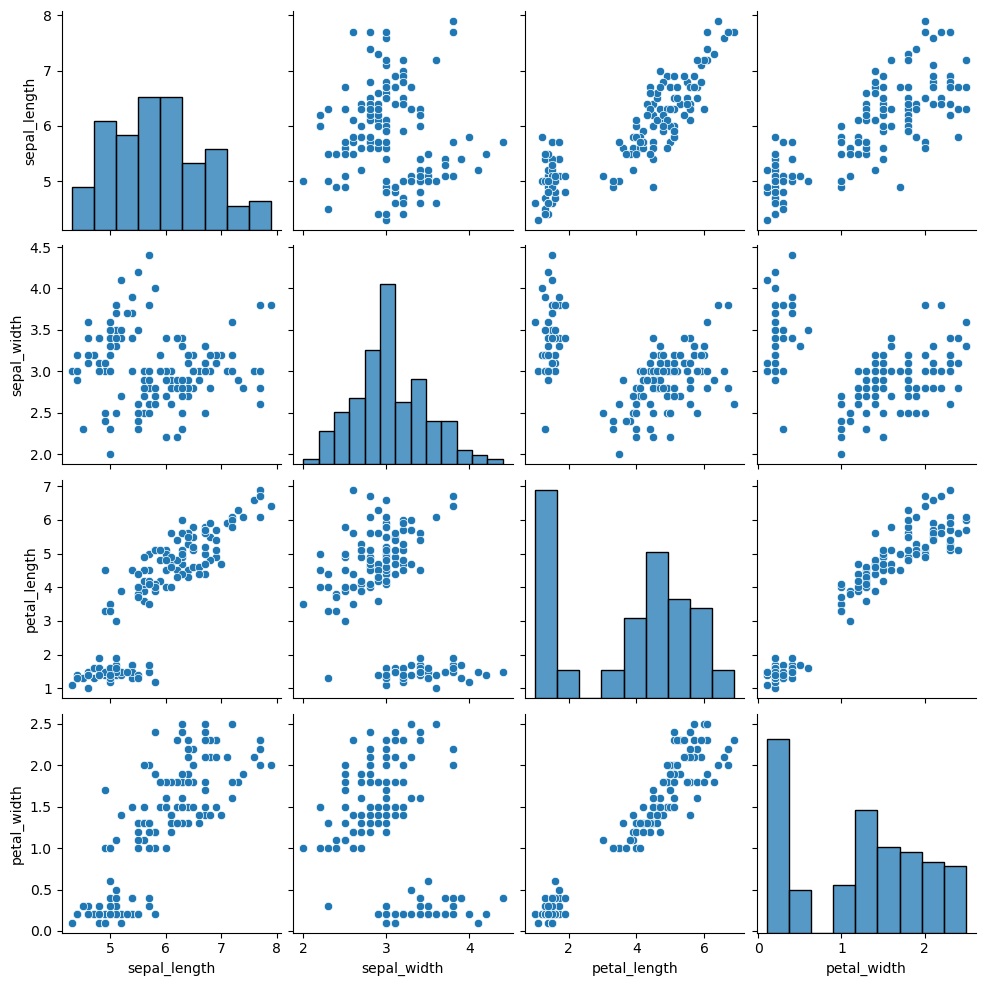

In [5]:
# now plot the graph to show the data is linearly seprable or not because K-Means on work on linear data

sns.pairplot(data=dataset)
plt.show()

In [7]:
# by above graph we could see that these data are linearly separable 

# And in unsupervised ML we not use Train test and split

In [8]:
from sklearn.cluster import KMeans

In [9]:
# now figure out how many cluster we could use, just try to use the cluster from 2 to 20 and find the best

wcss = []

for i in range(2, 21):
    km = KMeans(n_clusters=i, init="k-means++")
    km.fit(dataset)
    wcss.append(km.inertia_) # this will give us the wcss

d:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "d:\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "d:\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^

In [10]:
print(wcss)

[152.36870647733906, 78.9450658259773, 57.34540931571815, 46.56163015873016, 41.93413538011696, 40.618912108262116, 35.863705422647534, 28.868264844804326, 26.076421717171723, 25.618697038489948, 22.86691468253969, 22.94530280588976, 21.626944860694866, 20.12097696176373, 19.831149536737776, 16.982237734487736, 16.866789551951317, 15.74497435897436, 14.902328304048893]


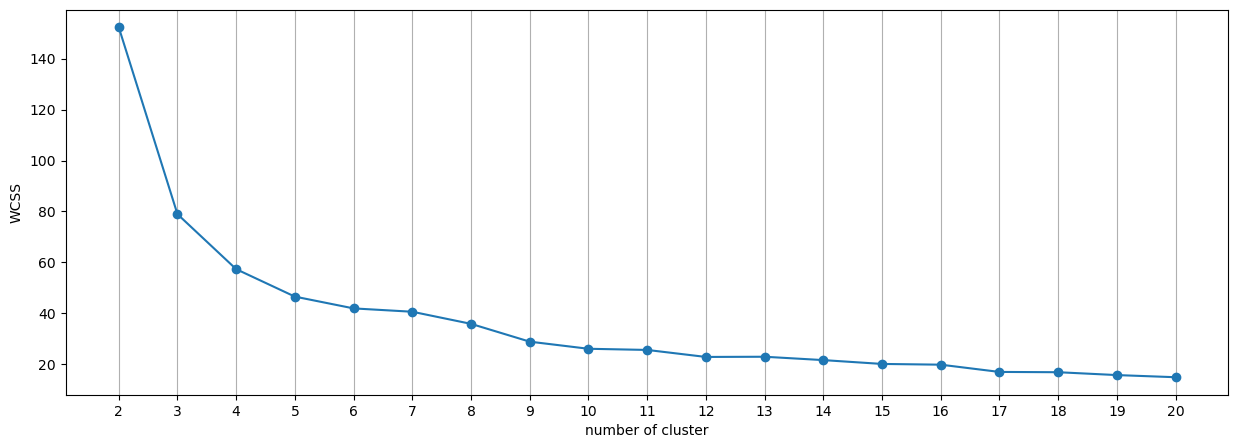

In [17]:
# now plot the graph between wcss and number or K (range(2, 21))
plt.figure(figsize=(15, 5))
plt.plot([i for i in range(2, 21)], wcss, marker="o")
plt.xticks([i for i in range(2, 21)])
plt.xlabel("number of cluster")
plt.ylabel("WCSS")
plt.grid(axis="x")
plt.show()

In [18]:
# we could see that there could be 3 or 4 cluster as per Elbow graph

In [ ]:
# now predict with K = 3

kmc = KMeans(n_clusters=3)
kmc.fit_predict(dataset)

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [20]:
# now add this as a column in out Dataset

dataset['Predict_3'] = kmc.fit_predict(dataset)
dataset.head(3)

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,Predict_3
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


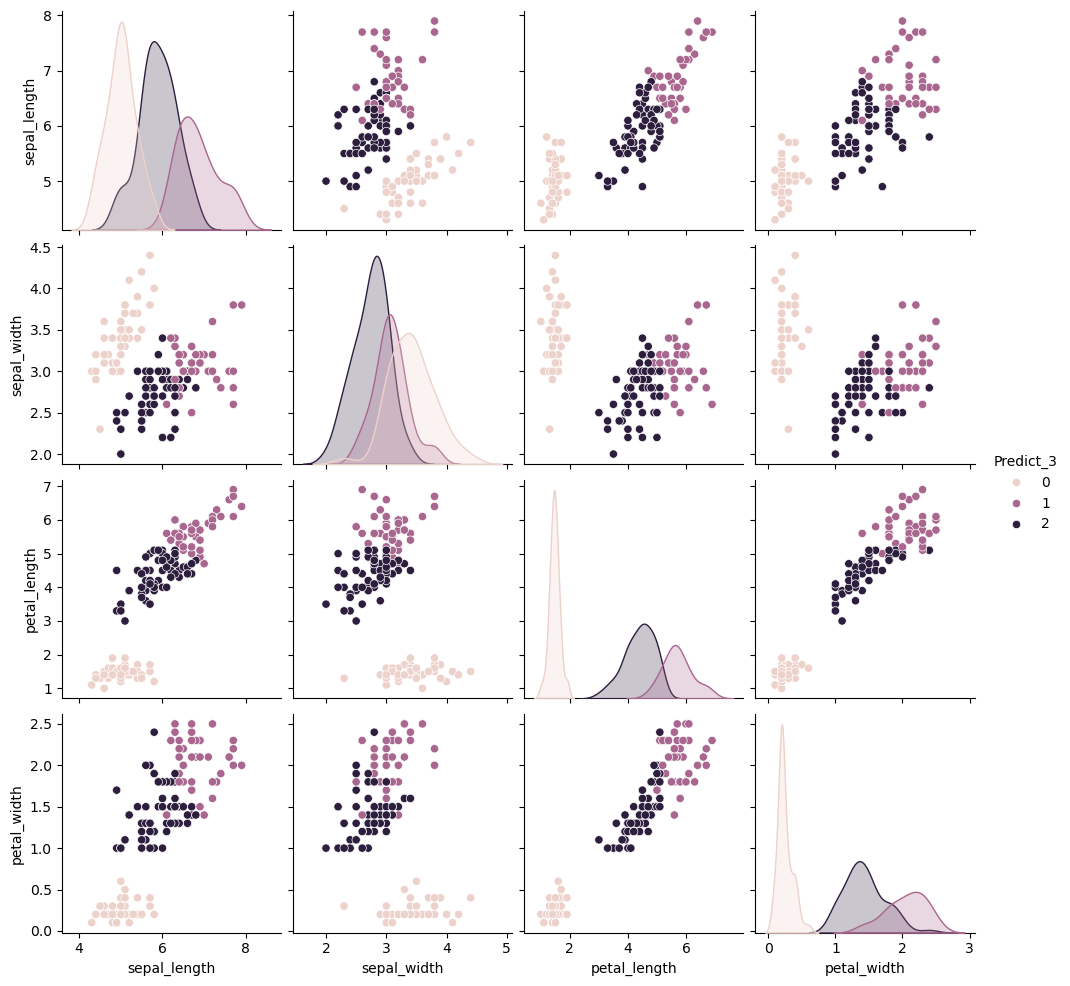

In [21]:
# now plot the cluster graph

sns.pairplot(data=dataset, hue="Predict_3")
plt.show()

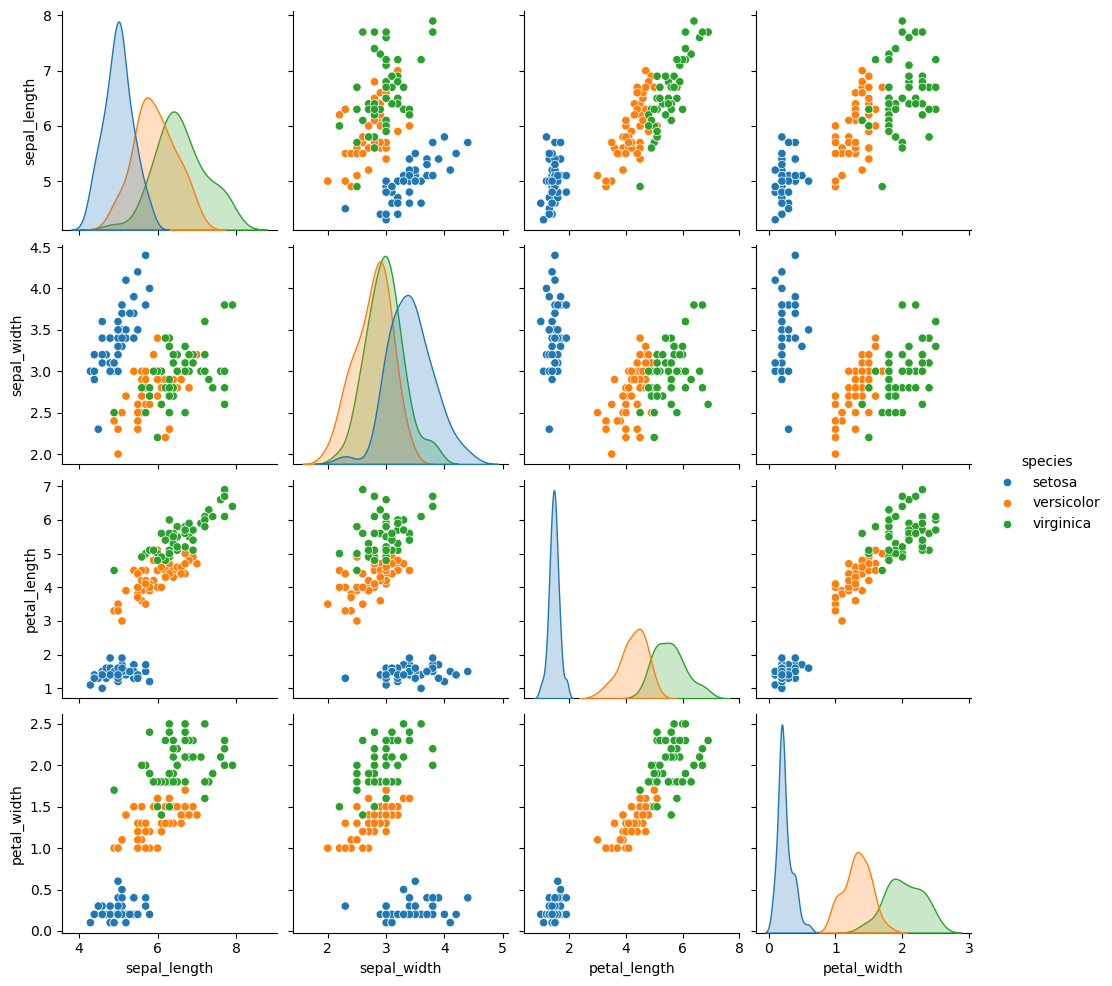

In [22]:
# now check the cluster in orignal dataset which is df

sns.pairplot(data=df, hue="species")
plt.show()

In [23]:
# now you could see that its looks like same.

## Now use K=4

In [24]:
# now predict with K = 3

kmc2 = KMeans(n_clusters=4)
kmc2.fit_predict(dataset)

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 3, 1, 1, 1, 3, 1, 3, 3, 1, 3, 1, 3, 1,
       1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 1, 3, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 3, 3, 1, 3, 3, 2, 1, 2, 2, 2, 2, 3, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [25]:
# now add this as a column in out Dataset

dataset['Predict_4'] = kmc2.fit_predict(dataset)
dataset.head(3)

d:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,sepal_length,sepal_width,petal_length,petal_width,Predict_3,Predict_4
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0


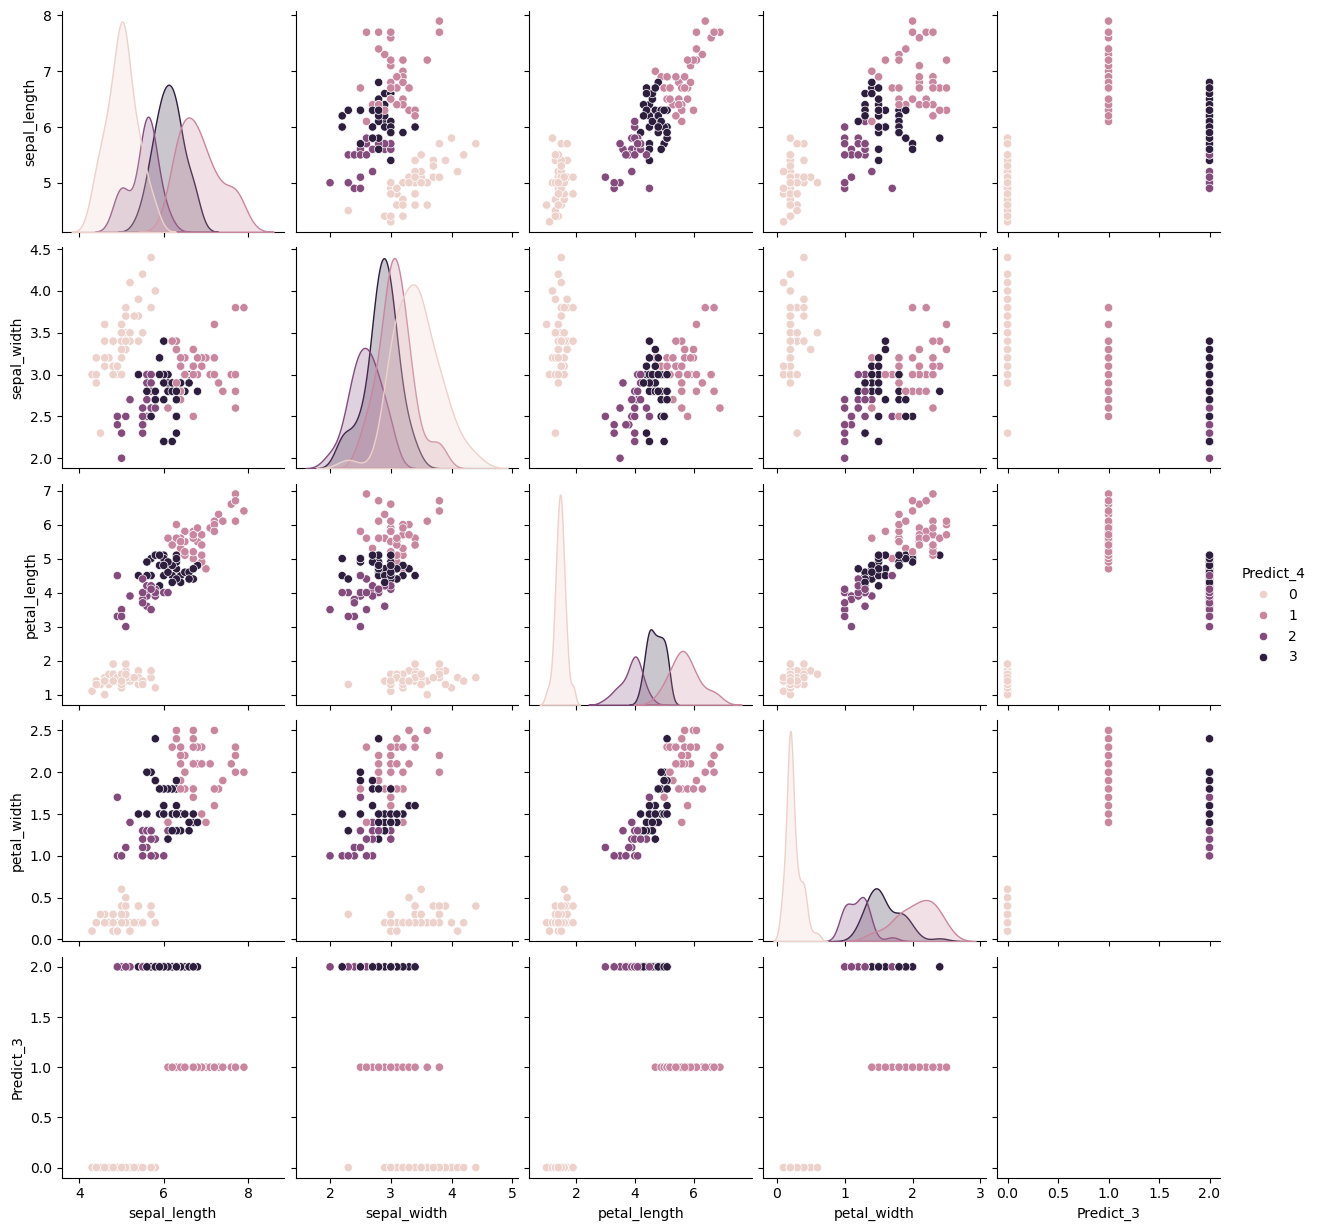

In [26]:
# now plot the cluster graph

sns.pairplot(data=dataset, hue="Predict_4")
plt.show()

In [27]:
# now you could see that K = 4 now works.